In [1]:
%matplotlib notebook

In [2]:
import numpy as np
from numpy import log, arctan2, pi, mean
from numpy.linalg import norm, solve
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import meshio
from bem import (assem, eval_sol, read_geo_gmsh,
                 surf_plot)

In [3]:
mesh, coords, elems, x_m, y_m, id_dir, id_neu = read_geo_gmsh("files/disk.msh", [0, 1], [2, 3])
Gmat, Fmat = assem(coords, elems)
theta = np.arctan2(y_m, x_m)
q_boundary = 3*np.cos(6*theta)
u_boundary = solve(Fmat, Gmat.dot(q_boundary))
solution = eval_sol(mesh.points[:, :2], coords, elems, u_boundary, q_boundary)

Visualization

<IPython.core.display.Javascript object>


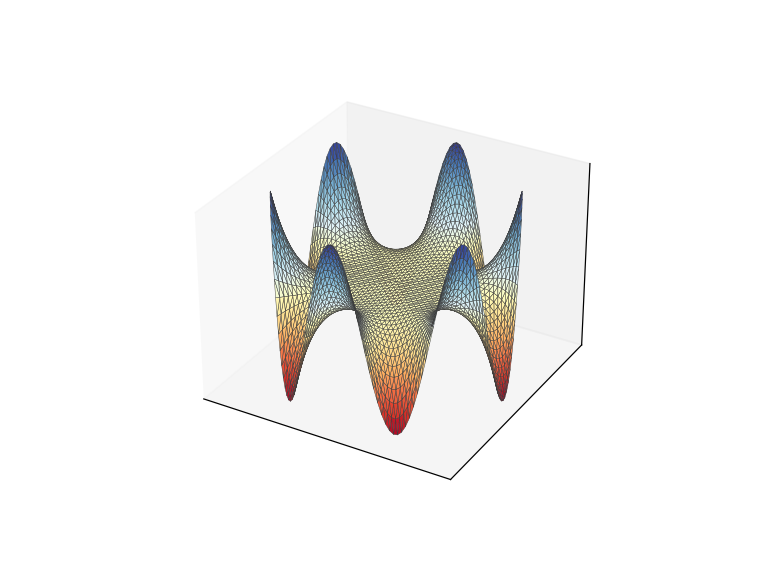

[]

In [4]:
ax = surf_plot(mesh, 4, solution)
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])

## Analytical solution

In this case, we can check that the solution is

$$u = -\frac{r^6}{2}\cos(6\theta)\, .$$

In [5]:
import sympy as sym

In [6]:
r, t = sym.symbols("r t")

In [7]:
sol = -r**6 * sym.cos(6*t)/2

In [8]:
sol_fun = sym.lambdify((r, t), sol)

In [9]:
ev_x, ev_y = mesh.points[:, :2].T
ev_r = np.sqrt(ev_x**2 + ev_y**2)
ev_t = np.arctan2(ev_y, ev_x)

In [10]:
sol_analytic = sol_fun(ev_r, ev_t)

<IPython.core.display.Javascript object>


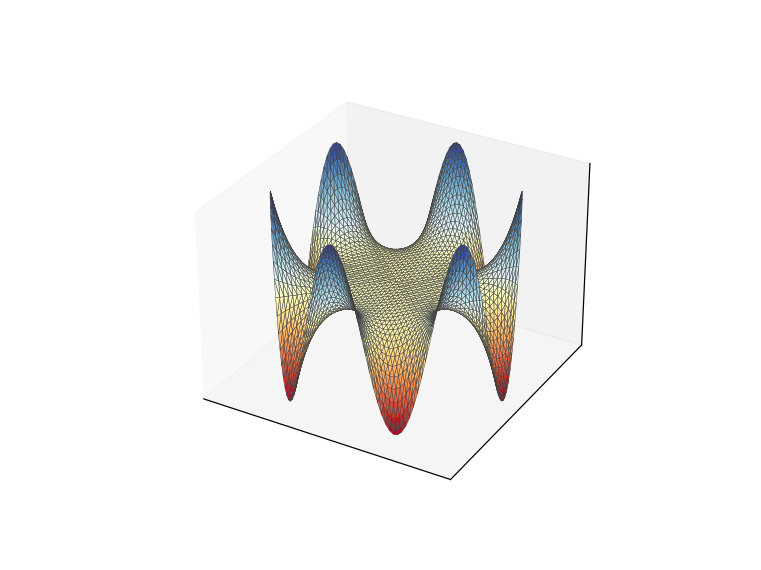

[]

In [11]:
ax = surf_plot(mesh, 4, sol_analytic)
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])

<IPython.core.display.Javascript object>


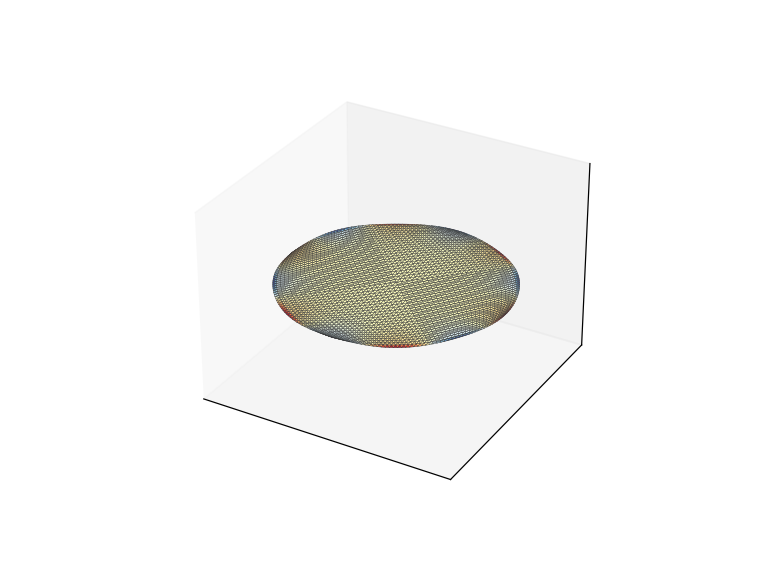

[]

In [12]:
ax = surf_plot(mesh, 4, sol_analytic - solution)
ax.set_zlim([-0.5, 0.5])
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])

In [13]:
rel_error = 100*np.linalg.norm(sol_analytic - solution)/np.linalg.norm(sol_analytic)
rel_error

2.097129420808843